# Android App Market Analysis - What Makes an App Popular?
## Final Report

*95-885 Data Science and Big Data - Project 1: Exploratory Data Analysis*

**Team 15<br>
Daniel You (sangwony)<br>
Jiaxuan Zhang (jiaxuanz)<br>
Yuran Zhu (yuranz)**

![title](google-play.jpg)

Link for our presentation on YouTube: [https://youtu.be/UewLG8n22sM](https://youtu.be/UewLG8n22sM)

# Content
[1. Introduction](#Introduction)<br>
[2. Recommendations](#Recommendations)<br>
[3. Data Collection & Preprocessing](#Data-Collection-&-Preprocessing)<br>
[4. App Rating Analysis](#App-Rating-Analysis)<br>
[5. App Price Analysis](#App-Price-Analysis)<br>
[6. App Size Analysis](#App-Size-Analysis)<br>
[7. User Review Analysis](#User-Review-Analysis)<br>
[8. Summary](#Summary)

# Introduction

With over 2.7 billion smartphone users across the world, it’s no surprise that the mobile app industry is thriving. As science and technology have been advanced swiftly, app markets are full of opportunities as well as challenges.

According to some [statistics](https://buildfire.com/app-statistics/), the **Apple App Store** has 2.2 million apps available for download while there are 2.8 million apps on the **Google Play Store**. Besides, the developers need to pay Apple \\$99/year to keep your app online, but only [$25 one time for Google Play Store](https://yalantis.com/blog/apple-app-store-and-google-play-store/). Given the more strict and slower apps released process in the Apple Store, many developers are more satisfied with the policies of Android apps. Therefore, a thorough analysis of the **Google Play Store data** is very important for the developers who want to put more effort into the Android market. In the long run, it may create enormous values for both the public and private sectors to keep up with the era of mobile internet. 

While many public datasets provide Apple App Store data, there are not many counterpart datasets and visualization available for Google Play Store apps anywhere on the web. We found the datasets on Kaggle really helpful and plan to explore more insgihts with the data. We aim to provide the developers with some actionable insights in the Android market through the visualization of Google Play Store apps data, including **finding Android market opportunities, improving pricing strategies and app design** for their app-making business.

With the datasets, we expect to answer the following questions that are interesting to both app developers and users. 

1. What categories of apps are most **available/popular** and receive **higher ratings**?
2. Do paid apps perform better than free apps? For paid apps, do those with higher ratings commonly have a **price in a reasonable range**? What categories tend to set **higher prices**?
3. Do users prefer apps with **lighter size**? That is to say, for each category, are top-rated apps tend to have less size? Can we find **a reasonable range of an app size**?
4. Among current apps, which categories receive the most positive reviews? What **factors make an app positively/negatively evaluated**? 

Followed by the `Recommendations` and `Data Collection & Preprocessing`, we'll develop analysis and visualization for those four questions in each section.

# Recommendations

Following the BLUF approach, we first display our recommendations for app developers in the Android market, which comes from 4 perspectives:

| Perspective | Recommendation |
| :----: | :---- |
| **Category** | 1. To have more and higher rating, you can pick the categories of family, game, tools, productivity, and medical |
| | 2. To have more revenue from installation, you can pick the categories of lifestyle, finance, family, and photography |
| **Free or Paid?** | If you want to have higher rating, you can choose to develop a paid app, but better to keep its price below $30 |
| **Size** | 1. Try to reduce your app's download size (below 40 MB) to enable more users to download your app |
| | 2. If you are developing game or family apps, larger app size is okay due to sophisticated design, but try to optimize the size |
| **User Reviews** | Design your app to be fun and easy to use, equip it with cool features, embed less advertisements, fix problems frequently, and charge less! |

# Data Collection & Preprocessing

## 1. Data collection

The data is scraped from the Google Play Store and is available at [Kaggle](https://www.kaggle.com/lava18/google-play-store-apps). The portfolio contains **two datasets** and we'll analyze both of them for developing a comprehensive data exploration. Here is a simple description of these two datasets:

- **Apps Information Data:** 
    - The dataset consists of 13 columns and 10,842 rows. 
    - Each row refers to a single Android app, and each column refers to one app characteristics, including the information for app category, rating, size, download counts. etc. 
<br>
- **Users Review Data:** 
    - The dataset consists of 5 columns and 64,295 rows. 
    - Each row refers to a single user review for an App, including values of sentiment type (positive/negative) and scores of sentiment polarity and sentiment subjectivity.

## 2. Data preprocessing

Most columns in the `Apps Information Data` are in type of object, while we need to convert them into numeric values for aggregation. So we'll first perform data preprocessing on the dataset. The works we've done includes:

- Remove an abnormal record due to missing value for `Category`
- Convert `Reviews` to int type
- Convert `Size` to float type, with MB as unit
- Convert `Price` to float type
- Add a new column for converting `Installs` to int type while keeping the original one

For `Users Review Data`, we process data in:
- Remove records with missing `Translated_Review`
- Add `Category` column by joining two datasets we have for further category by category analysis

Fore more details about data inspection and processing, please check the `Data-preprocessing.ipynb`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from plotnine import *
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
import spacy
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('googleplaystore.csv')
df_r = pd.read_csv('googleplaystore_user_reviews.csv')

### Apps Information Data

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.dtypes;

First to have a look at `Category`.

In [5]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

It seems that `1.9` is a wrong category type, let's find this record. 

In [6]:
df[df['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Actually, the category of this app is missing and all other values are pushed left for one column. Since our user reviews dataset is generated based on categories listed in `df`, we cannot propoerly assign the correct category for this app. Therefore, we'll drop this app record.

In [7]:
df.drop(10472, inplace = True)

In [8]:
# Convert `Reviews` to int type
df['Reviews'] = df['Reviews'].astype(int)

In [9]:
# Check `Size` column
df['Size'].unique();

In [10]:
# For uncertain sizes, code as NaN
df['Size'].replace('Varies with device', np.nan, inplace = True)

# Convert k/M to int, use MB as the unit
df['unit'] = df['Size'].str[-1]
df['unit'].replace('k', 10**(-3), inplace = True)
df['unit'].replace('M', 1, inplace = True)
df['Size'] = df['Size'].str.replace(r'[kM]', '').astype(float) * df['unit']
df.drop(['unit'], axis = 1, inplace = True)
df.head();

In [11]:
# Convert `Price` to float type
df['Price'] = df['Price'].str.replace('$', '').astype(float)
# Add a new column for converting `Installs` to int type while keeping the original one
df['Installs_val'] = df['Installs'].str.replace(r'[,+]','').astype(int)

In [12]:
# Check 
df.dtypes;

In [13]:
# Export cleaned dataset
df.to_csv(r'cleaned_googleplaystore.csv', index = False)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_val
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000


In [14]:
df = pd.read_csv("cleaned_googleplaystore.csv")

In [15]:
# Numerical variables
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rating,9366.0,4.191757e+00,5.152189e-01,1.0000,4.0,4.3,4.5,5.000000e+00
Reviews,10840.0,4.441529e+05,2.927761e+06,0.0000,38.0,2094.0,54775.5,7.815831e+07
Size,9145.0,2.151653e+01,2.258875e+01,0.0085,4.9,13.0,30.0,1.000000e+02
Price,10840.0,1.027368e+00,1.594970e+01,0.0000,0.0,0.0,0.0,4.000000e+02
Installs_val,10840.0,1.546434e+07,8.502936e+07,0.0000,1000.0,100000.0,5000000.0,1.000000e+09


In [16]:
# Categorical variables
df.describe(exclude = np.number).transpose()

,count,unique,top,freq
App,10840,9659,ROBLOX,9
Category,10840,33,FAMILY,1972
Installs,10840,21,"1,000,000+",1579
Type,10839,2,Free,10039
Content Rating,10840,6,Everyone,8714
Genres,10840,119,Tools,842
Last Updated,10840,1377,"August 3, 2018",326
Current Ver,10832,2831,Varies with device,1459
Android Ver,10838,33,4.1 and up,2451


### Users Review Data

In [17]:
df_r.describe(exclude = np.number).transpose()

,count,unique,top,freq
App,64295,1074,Bowmasters,320
Translated_Review,37427,27994,Good,247
Sentiment,37432,3,Positive,23998


Rows with missing `Translated_Review` values will also have missing values in `Sentiment`, `Sentiment_Polarity`, and `Sentiment_Subjectivity`. We will to drop all the missing values in `Translated_Review` column and check if there are same number of rows of null value for each columns.

In [18]:
df_r = df_r.dropna(subset=['Translated_Review'])

In [19]:
print(len(df_r));
df_r.isnull().sum();

37427


Then we add `Category` column by joining two dataset tables together, for further analysis on reviews by app category.

In [20]:
df_c = df[['App','Category']]

In [21]:
df_c = df_c.drop_duplicates(subset=['App'])
df_joined = df_r.merge(df_c, on='App', how='left')
df_joined.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH_AND_FITNESS
3,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,HEALTH_AND_FITNESS
4,10 Best Foods for You,Best way,Positive,1.00,0.300000,HEALTH_AND_FITNESS


In [22]:
# Check num of records and null values
print(len(df_joined))
print(len(df_c))
print(len(df_r))
df_joined.isnull().sum()

37427
9659
37427


App                          0
Translated_Review            0
Sentiment                    0
Sentiment_Polarity           0
Sentiment_Subjectivity       0
Category                  1498
dtype: int64

1,498 missing values are 4% to 37,427 so we will get rid of the rows with `Category` is null.


In [23]:
# Drop NA
df_joined = df_joined.dropna(subset=['Category'])

In [24]:
# Export cleaned user review dataset
df_joined.to_csv(r'cleaned_review_data.csv', index = False)

#  App Rating Analysis

In this part, we'll focus on app **rating**. We'll develop analysis on the following aspects:

- What categories have **most apps available** and how about their **market shares**?
- On average, what app categories receive **higher ratings**?

## 1. App availability

First, we visualize the app counts grouped by categories to see what categories have most apps available. The barchart shows the exact number of total apps by category and the pie chart visuals for the **TOP 5 categories**.

The barchart shows **obvious difference of app availability** in the current app market among various categories:
- `Family`, `Game`, `Tools` apps have the most app availability, indicating the **popularity** of those types, also revealing there may be more **fierce competition** for those types of apps.
- `Beauty`, `Parenting`, `Comics`, `Events` and some other categories have less apps availabe n the market, it may tell us there could be **more opportunities** for developing apps in those directions.

Text(0.5, 1.0, 'Number of counts on Category')

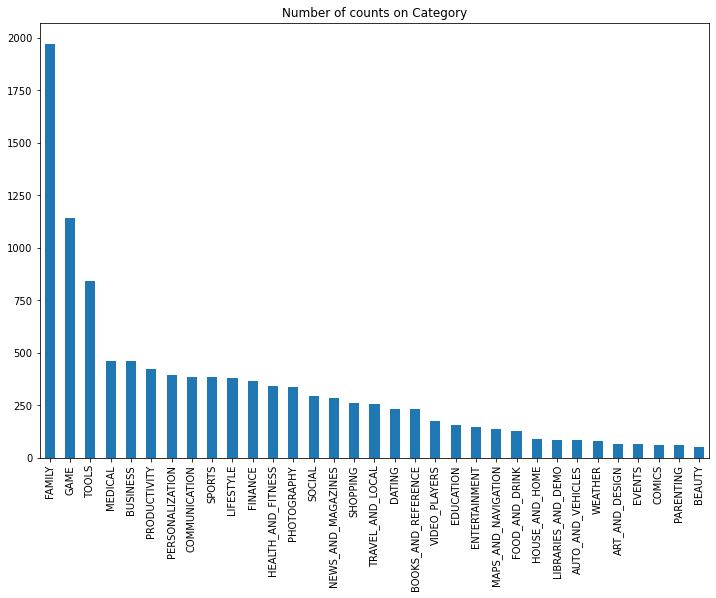

In [25]:
plt.figure(figsize = (12,8))
df['Category'].value_counts().plot.bar()
plt.title('Number of counts on Category')

From the pie chart: It's apprent that **`Family` and `Game` apps have the highest share of apps** in the Android market, they totally take up **28.8 %** market share. Besides,
**`Tools`, `Medical` and `Business`** apps also have larger number of apps available for users.

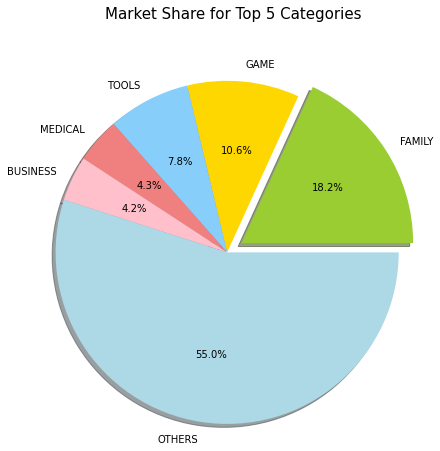

In [26]:
labels = list(df['Category'].value_counts().index[:5])
labels.append('OTHERS')
shares = list(df['Category'].value_counts().values[:5])
shares.append(sum(df['Category'].value_counts().values[5:]))

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'pink', 'lightblue']
explode = (0.1, 0, 0, 0, 0, 0) 
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot()
ax.pie(shares, labels=labels, autopct='%1.1f%%', colors = colors, 
       explode = explode, shadow=True, )
ax.axis('equal')  

plt.title('Market Share for Top 5 Categories', y = 1.1, fontsize = 15)
plt.show()

## 2. App rating

We then begin to explore app **rating**. 

- From the histogram, a majority of apps receive ratings more than **4.0**.
- From the catplot, we can find those categories with less apps seem to have lower rating less frequently, such as `Beauty`, `Events`, etc. 

Text(0.5, 1.0, 'Number of counts on Rating')

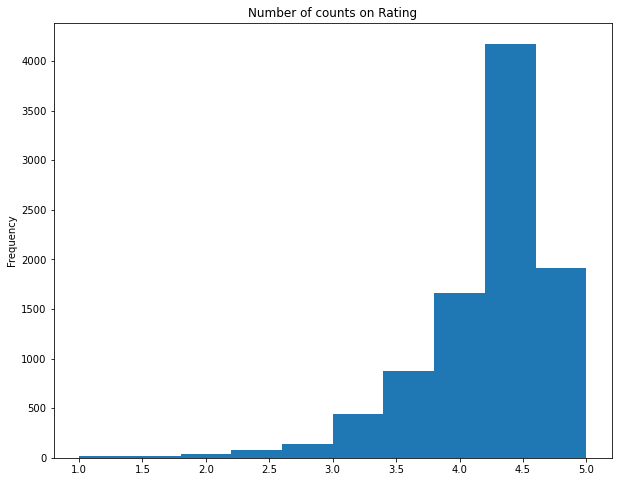

In [27]:
plt.figure(figsize = (10,8))
df['Rating'].plot.hist()
plt.title('Number of counts on Rating')

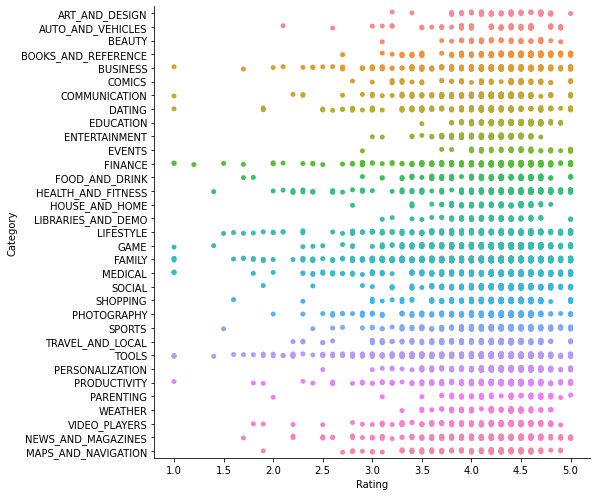

In [28]:
sns.catplot(x="Rating", y="Category", data=df, height=7, aspect=1.2)

Moreover, we sort app categories based on rating data and hope to find the **TOP 5 app categories** that seem to have higher probability of getting higher evaluation. 

When we are deciding on which application category will have the highest probability of beings succesful, we took into acount the **mean score** of `Rating` and the **total number of times** it has been rated by users. 
- Mean score was used because the `Rating` ranges from 1 to 5, so there is no outliers. 
- Number of times it was rated was taken into account because categories, such as `Beauty` and `Events` scored highly on the mean score but was rated by only few dozens of users compared to `Family` category which was rated over 1,000 times.

In [29]:
df_group = df.groupby('Category').agg({'Rating': ['mean', 'min', 'max','count']})
df_group = df_group.sort_values(by=[('Rating', 'count'),('Rating', 'mean')],ascending=[False,False])
df_group

Rating                
                         mean  min  max count
Category                                     
FAMILY               4.192272  1.0  5.0  1747
GAME                 4.286326  1.0  5.0  1097
TOOLS                4.047411  1.0  5.0   734
PRODUCTIVITY         4.211396  1.0  5.0   351
MEDICAL              4.189143  1.0  5.0   350
COMMUNICATION        4.158537  1.0  5.0   328
FINANCE              4.131889  1.0  5.0   323
SPORTS               4.223511  1.5  5.0   319
PHOTOGRAPHY          4.192114  2.0  5.0   317
PERSONALIZATION      4.335987  2.5  5.0   314
LIFESTYLE            4.094904  1.5  5.0   314
BUSINESS             4.121452  1.0  5.0   303
HEALTH_AND_FITNESS   4.277104  1.4  5.0   297
SOCIAL               4.255598  1.9  5.0   259
SHOPPING             4.259664  1.6  5.0   238
NEWS_AND_MAGAZINES   4.132189  1.7  5.0   233
TRAVEL_AND_LOCAL     4.109292  2.2  5.0   226
DATING               3.970769  1.0  5.0   195
BOOKS_AND_REFERENCE  4.346067  2.7  5.0   178
VIDEO_PLAYERS        4.063750  1.8  4.9   160
EDUCATION            4.389032  3.5  4.9   155
ENTERTAINMENT        4.126174  3.0  4.7   149
MAPS_AND_NAVIGATION  4.051613  1.9  4.9   124
FOOD_AND_DRINK       4.166972  1.7  5.0   109
HOUSE_AND_HOME       4.197368  2.8  4.8    76
WEATHER              4.244000  3.3  4.8    75
AUTO_AND_VEHICLES    4.190411  2.1  4.9    73
LIBRARIES_AND_DEMO   4.178462  3.1  5.0    65
ART_AND_DESIGN       4.358065  3.2  5.0    62
COMICS               4.155172  2.8  5.0    58
PARENTING            4.300000  2.0  5.0    50
EVENTS               4.435556  2.9  5.0    45
BEAUTY               4.278571  3.1  4.9    42

Based on this criteria, **Top 5 apps** were:
- `Family`
- `Game`
- `Tools`
- `Productivity`
- `Medical`

So in the current app market, those categories of apps are more welcomed by users. It seems to have more prospects in developing those apps if developers have well address pain points and app tests. 

# App Price Analysis

We'll focus on app **price** in this part, and aim to conclude some ideas on price strategy. We'll analyze from the following aspects:

- Do paid apps perform better than free apps? 
- For paid apps, do those with higher ratings commonly have **a price in a reasonable range**? 
- What categories tend to set **higher prices**?

For the first hypothesis regarding price, we suppose paid apps perform better than free apps, which can be replected by the **rating**. Followed by this idea, we calculate the **mean score** of `Rating` for each group (paird & free) and plot them into a bar chart.

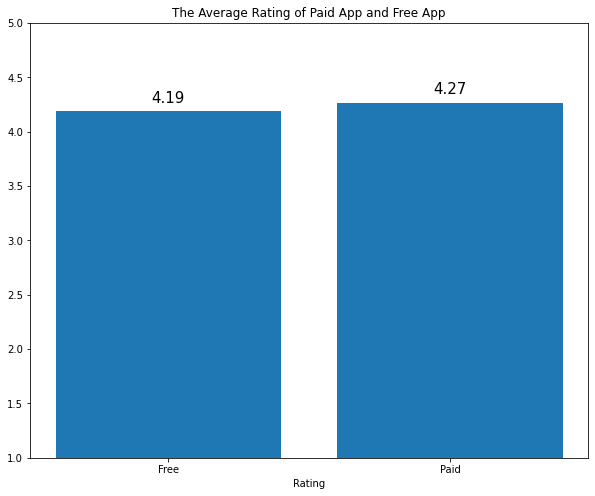

In [30]:
grouped=df['Rating'].groupby(df['Type'])

plt.figure(figsize = (10,8))
plt.bar(grouped.mean().index, grouped.mean().values)
plt.title('The Average Rating of Paid App and Free App')
plt.xlabel('Rating')
plt.ylim(1, 5)
for a,b in zip(grouped.mean().index,grouped.mean().values):
    plt.text(a, b+0.05, '%.2f' % b, ha='center', va= 'bottom',fontsize=15)
plt.show()

From the bar chart above, we can see:
- The paid apps have a **higher average rating** than free apps.
- But the **rating difference is small**, which is less than `0.1`

Higher rating for the paid apps seems to be intuitive, since paid apps tend to have better design and provide favorable user experience.

Second, we want to see if apps with higher ratings commonly have a price in a reasonable range. We first seperate the high-rating records (`Rating >= 4.0`) based on their rating with **0.2 interval** and visualize the corresponding price range.

Text(0.5, 1.0, 'Price Distribution for High-rating Apps')

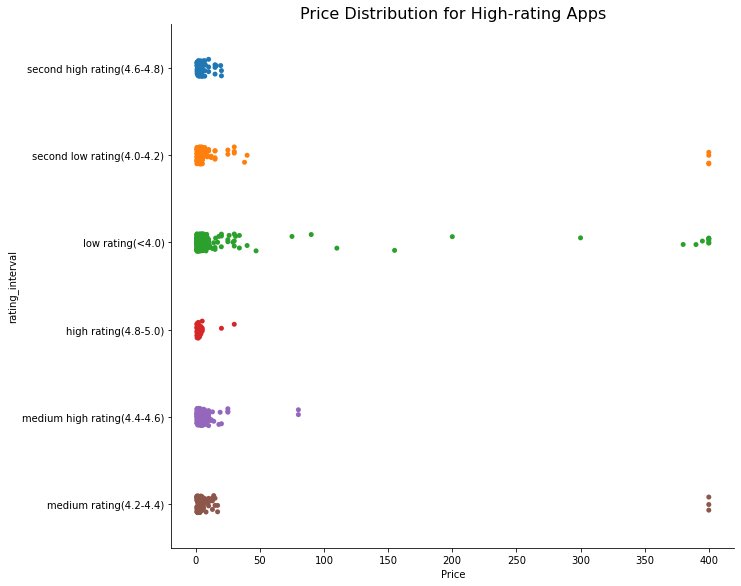

In [31]:
def interval(r):
    if r > 4.8 and r <= 5.0:
        return 'high rating(4.8-5.0)'
    elif r > 4.6 and r <= 4.8:
        return 'second high rating(4.6-4.8)'
    elif r > 4.4 and r <= 4.6:
        return 'medium high rating(4.4-4.6)'
    elif r > 4.2 and r <= 4.4:
        return 'medium rating(4.2-4.4)'
    elif r >= 4.0 and r <= 4.2:
        return 'second low rating(4.0-4.2)'
    else:
        return 'low rating(<4.0)'
df['rating_interval'] = df['Rating'].map(lambda x: interval(x))
sns.catplot(x="Price", y="rating_interval", data=df[df['Type']=='Paid'], height=8, aspect=1.3)
plt.title('Price Distribution for High-rating Apps', fontsize = 16)

From the scatter plot above, we can see that **higher rating apps tend to have smaller range of price**. We also notice there exist apps charging **very high** prices up to `$400`.

We then plot the distribution of paid app prices, and find **most of those are located in `$30` or lower price range.**

Text(0.5, 1.0, 'Histogram of Paid Apps Price')

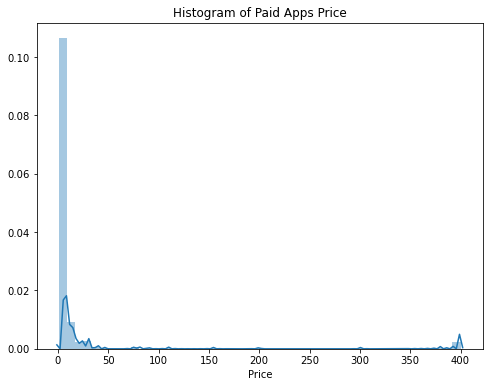

In [32]:
plt.figure(figsize = (8,6))
sns.distplot(df[df['Price'] > 0].Price)
plt.title('Histogram of Paid Apps Price')

Next, we grouped apps based on their price - group paid apps into **4** separate groups: `Very cheap`, `Cheap`, `Expensive`, `Very expensive`, and plot the rating range as well as calculate average rating.

Text(0.5, 1.0, 'Rating Distribution for Different Price Ranges')

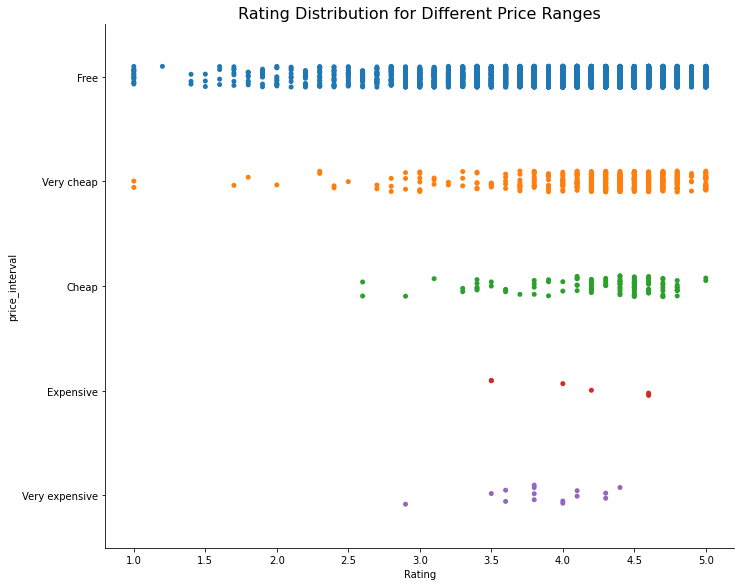

In [33]:
def price_interval(p):
    if p == 0:
        return 'Free'
    elif p > 0 and p <= 5:
        return 'Very cheap'
    elif p > 5 and p <= 30:
        return 'Cheap'
    elif p > 30 and p <= 200:
        return 'Expensive'
    elif p > 200:
        return 'Very expensive'
    else:
        return 'low rating(<4.0)'
df['price_interval'] = df['Price'].map(lambda x: price_interval(x))
sns.catplot(x="Rating", y="price_interval", data=df, height=8, aspect=1.3)
plt.title('Rating Distribution for Different Price Ranges', fontsize = 16)

In [34]:
df[['price_interval', 'Rating']].groupby(['price_interval']).mean().sort_values('Rating')

,Rating
price_interval,
Very expensive,3.866667
Expensive,4.066667
Free,4.186203
Cheap,4.265546
Very cheap,4.281065


**We come to find:**
- On average, apps with prices under `$5` have higher rating. The high evaluation may be due to better design and a reasonbale price meant for users.
- Very expensive apps have the lowest average rating. It may result from users's unsatisfaction for the unbalance between the very high price and so-so user experience. 

Therefore, for app developers, they **shouldn't set the app price too high**, it may take risk of strict evaluation and lower downloads.

For the third question of what categories tend to set higher prices, we plot the bar chart to visualize the difference of each category's average price in **paid app**.

Category
FINANCE                170.637059
LIFESTYLE              124.256316
EVENTS                 109.990000
BUSINESS                13.233571
MEDICAL                 13.210642
FAMILY                  12.747539
PRODUCTIVITY             8.961786
PHOTOGRAPHY              6.100455
MAPS_AND_NAVIGATION      5.390000
SOCIAL                   5.323333
PARENTING                4.790000
DATING                   4.490000
AUTO_AND_VEHICLES        4.490000
EDUCATION                4.490000
BOOKS_AND_REFERENCE      4.277500
FOOD_AND_DRINK           4.240000
HEALTH_AND_FITNESS       4.208750
SPORTS                   4.166667
TRAVEL_AND_LOCAL         4.162500
WEATHER                  4.052500
ENTERTAINMENT            3.990000
GAME                     3.461446
TOOLS                    3.426282
COMMUNICATION            3.079259
SHOPPING                 2.740000
VIDEO_PLAYERS            2.615000
NEWS_AND_MAGAZINES       1.990000
ART_AND_DESIGN           1.990000
PERSONALIZATION          1.854940
LIBRA

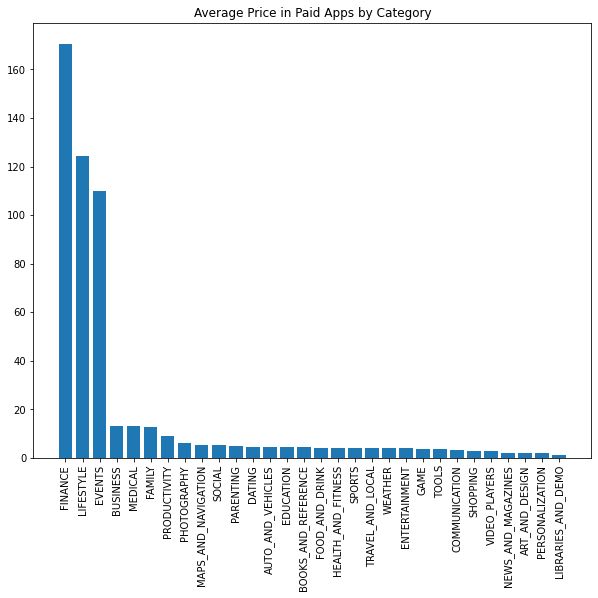

In [35]:
grouped_paid = df['Price'][df['Type'] == 'Paid'].groupby(df['Category'])
res = grouped_paid.mean().sort_values(ascending=False)
print(res)
plt.figure(figsize = (10,8))
plt.bar(res.index, res.values)
plt.xticks(rotation=90)
plt.title('Average Price in Paid Apps by Category')
plt.show()

Then, we want to know the **revenue** from just installing the paid app.

Category
LIFESTYLE              3.030734e+06
FINANCE                1.513334e+06
FAMILY                 9.740975e+05
PHOTOGRAPHY            9.510349e+05
EDUCATION              6.009950e+05
WEATHER                5.226725e+05
GAME                   4.938270e+05
ENTERTAINMENT          3.990000e+05
MAPS_AND_NAVIGATION    2.481578e+05
SPORTS                 1.960922e+05
COMMUNICATION          1.573098e+05
PRODUCTIVITY           1.540491e+05
BUSINESS               1.463245e+05
FOOD_AND_DRINK         1.422000e+05
PARENTING              1.249795e+05
MEDICAL                1.245399e+05
PERSONALIZATION        1.238186e+05
HEALTH_AND_FITNESS     1.078168e+05
TRAVEL_AND_LOCAL       9.595870e+04
VIDEO_PLAYERS          8.382250e+04
TOOLS                  7.006180e+04
AUTO_AND_VEHICLES      3.338283e+04
SHOPPING               1.507450e+04
DATING                 1.262307e+04
ART_AND_DESIGN         1.061333e+04
NEWS_AND_MAGAZINES     3.222500e+03
BOOKS_AND_REFERENCE    3.222384e+03
SOCIAL             

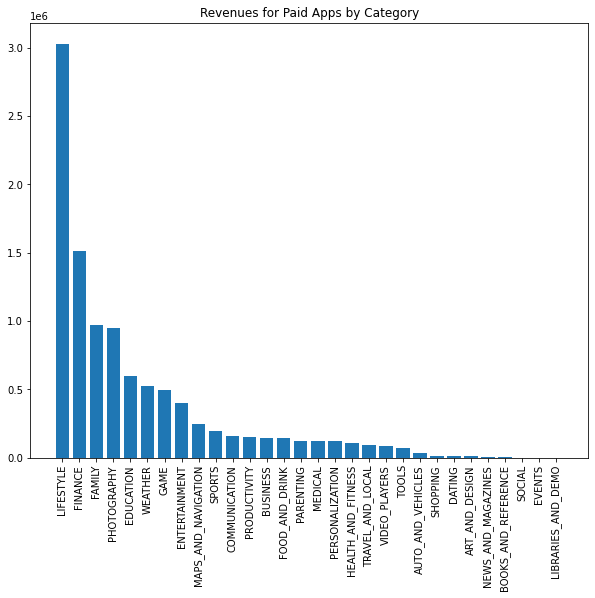

In [36]:
df['Revenue'] = df['Installs_val'] * df['Price']
grouped_paid = df['Revenue'][df['Type'] == 'Paid'].groupby(df['Category'])
res = grouped_paid.mean().sort_values(ascending=False)
print(res)
plt.figure(figsize = (10,8))
plt.bar(res.index, res.values)
plt.xticks(rotation=90)
plt.title('Revenues for Paid Apps by Category')
plt.show()

The two barcharts tell us: the categories of `lifestyle, Finance, Family, and Photography` are **more profitable for the developers** if they simply want to earn the installation charge.

# App Size Analysis

In this part, we'll focus on app **size** and aim to conclude some ideas on app size tuning. We'll develop analysis on the following aspects:

- In general, how app size differs in the same category and different **categories**?
- What's the relationship between **installs** and **size**? What size range enables more users to download an app?
- What's the relationship between **rating** and **size**? What could be an optimized size range for higher rating?

## 1. Size difference between categories

We first explore the distribution of app `size`, and find that in the Google Play Store, **75%** of all apps have size less than or equal to **30 MB**.

In [37]:
df['Size'].describe()

count    9145.000000
mean       21.516530
std        22.588748
min         0.008500
25%         4.900000
50%        13.000000
75%        30.000000
max       100.000000
Name: Size, dtype: float64

Next, in visualizing disbribution of app size, we can explore difference/similarity between `Free` and `Paid` apps:

- Both `Free` and `Paid` apps have a large partial of size located at the lower level.
- For `Paid` apps, most of them have size less than or equal to **50 MB**, while `Free` apps have sizes up to **100 MB**.

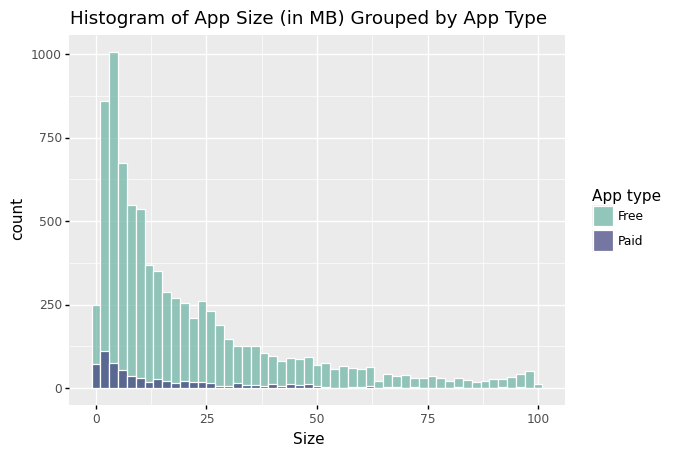

<ggplot: (312333276)>

In [38]:
(ggplot(data = df, mapping = aes(x = 'Size', fill = 'Type')) 
  + geom_histogram(binwidth = 2, color = 'white', alpha = 0.7, position = 'identity') 
  + scale_fill_manual(values = ['#69b3a2', '#404080'])
  + labs(fill = 'App type',title = 'Histogram of App Size (in MB) Grouped by App Type')
)

Then we move to different `categories`, and focus on the ten most representative categories in terms of app amounts. We generate a boxplot for observing the distribution of app size among all categories, and generate a histogram for the top 10 categories.

- The boxplot shows: On average, `GAME` and `FAMILY` apps tend to have **larger size** compared to other categories.
- The histogram shows: Most of those categories have a large partial of **small app size**. 

It's interesting to see `GAME` and `FAMILY` apps have considerable sizes distributed on the higher level - which is intuitive since those apps commonly load more content and require sophisticated designs.

[Text(0, 0, 'ART_AND_DESIGN'),
 Text(1, 0, 'AUTO_AND_VEHICLES'),
 Text(2, 0, 'BEAUTY'),
 Text(3, 0, 'BOOKS_AND_REFERENCE'),
 Text(4, 0, 'BUSINESS'),
 Text(5, 0, 'COMICS'),
 Text(6, 0, 'COMMUNICATION'),
 Text(7, 0, 'DATING'),
 Text(8, 0, 'EDUCATION'),
 Text(9, 0, 'ENTERTAINMENT'),
 Text(10, 0, 'EVENTS'),
 Text(11, 0, 'FINANCE'),
 Text(12, 0, 'FOOD_AND_DRINK'),
 Text(13, 0, 'HEALTH_AND_FITNESS'),
 Text(14, 0, 'HOUSE_AND_HOME'),
 Text(15, 0, 'LIBRARIES_AND_DEMO'),
 Text(16, 0, 'LIFESTYLE'),
 Text(17, 0, 'GAME'),
 Text(18, 0, 'FAMILY'),
 Text(19, 0, 'MEDICAL'),
 Text(20, 0, 'SOCIAL'),
 Text(21, 0, 'SHOPPING'),
 Text(22, 0, 'PHOTOGRAPHY'),
 Text(23, 0, 'SPORTS'),
 Text(24, 0, 'TRAVEL_AND_LOCAL'),
 Text(25, 0, 'TOOLS'),
 Text(26, 0, 'PERSONALIZATION'),
 Text(27, 0, 'PRODUCTIVITY'),
 Text(28, 0, 'PARENTING'),
 Text(29, 0, 'WEATHER'),
 Text(30, 0, 'VIDEO_PLAYERS'),
 Text(31, 0, 'NEWS_AND_MAGAZINES'),
 Text(32, 0, 'MAPS_AND_NAVIGATION')]

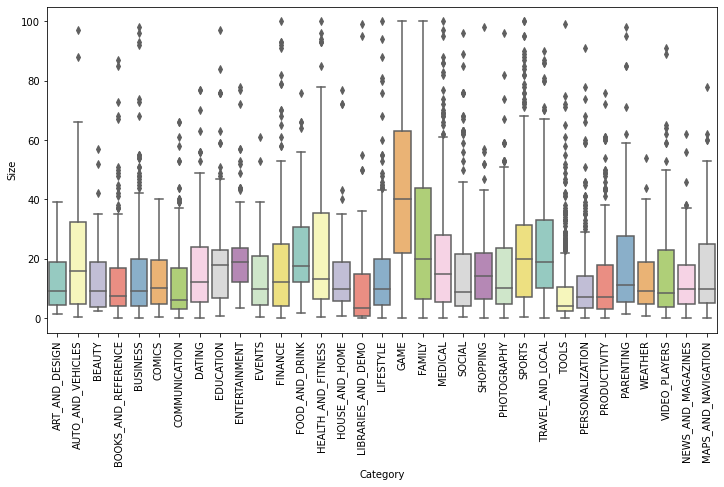

In [39]:
plt.figure(figsize = (12,6))
p = sns.boxplot(x = "Category", y = "Size", data = df, palette = 'Set3')
#p.set_yscale("log")
p.set_xticklabels(p.get_xticklabels(), rotation = 90)
#plt.title()

In [40]:
# generate a pivot table for summarizing number of apps, average rating
df_pivot = pd.pivot_table(df, values=['Rating', 'App'], index=['Category'],
                          aggfunc = {'Rating': np.mean,
                                     'App': len}).rename(columns = {'App': 'count',
                                                                    'Rating': 'mean_rating'})
df_pivot.head()

,count,mean_rating
Category,,
ART_AND_DESIGN,65,4.358065
AUTO_AND_VEHICLES,85,4.190411
BEAUTY,53,4.278571
BOOKS_AND_REFERENCE,231,4.346067
BUSINESS,460,4.121452


In [41]:
# Top 10 categories with highest counts of apps
top10_cnt_cat = list(df_pivot.sort_values(by = 'count', ascending = False)[:10].index)
top10_cnt_cat

['FAMILY',
 'GAME',
 'TOOLS',
 'MEDICAL',
 'BUSINESS',
 'PRODUCTIVITY',
 'PERSONALIZATION',
 'COMMUNICATION',
 'SPORTS',
 'LIFESTYLE']

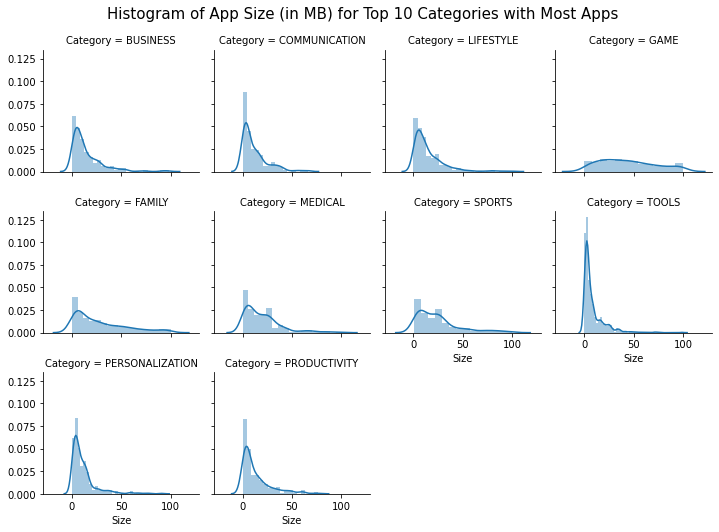

In [42]:
g = sns.FacetGrid(df[df['Category'].isin(top10_cnt_cat)],
                    col='Category', col_wrap = 4, height = 2.5)
g.map(sns.distplot, 'Size')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Histogram of App Size (in MB) for Top 10 Categories with Most Apps',
               fontsize = 15)
plt.show()

## 2. Find a favorable size range

App users often avoid downloading apps that seem too large, which means an optimized app size is helpful in enabling more users to download the app. Now we're going to explore the optimized size range from the perpectives of **installs and rating**.

We first explore the relationship between app `Installs` and `size`, focusing on apps that have received **500,000+** installs.

The first histogram shows: **For top-downloaded Apps (>= 500,000+ times), a majority of them are sized below 50 MB.**

In [43]:
top_installs = sorted(df['Installs'].unique().tolist(), key = lambda x: (len(x), x[0]), reverse = True)[:8]
top_installs

['1,000,000,000+',
 '500,000,000+',
 '100,000,000+',
 '50,000,000+',
 '10,000,000+',
 '5,000,000+',
 '1,000,000+',
 '500,000+']

In [44]:
df_2 = df
df_2['installs_val'] = df_2['Installs'].str.replace(r'[,+]','').astype(int)
df_2.sort_values(by = 'installs_val', inplace = True)

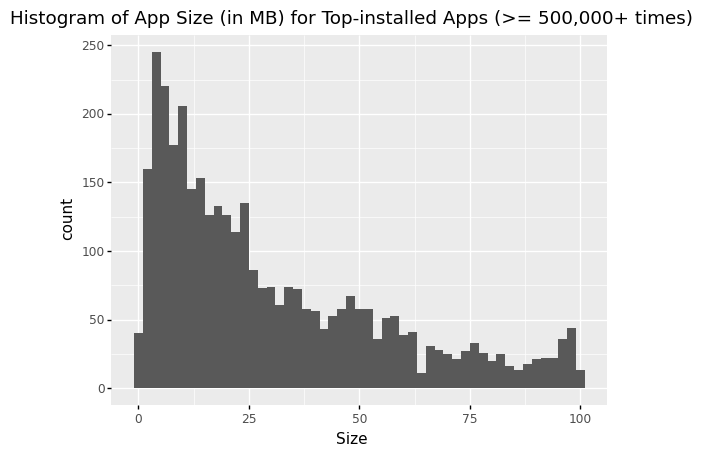

<ggplot: (312384675)>

In [45]:
(ggplot(data = df[df['Installs'].isin(top_installs)], mapping = aes(x = 'Size')) 
  + geom_histogram(binwidth = 2)
  + labs(title = 'Histogram of App Size (in MB) for Top-installed Apps (>= 500,000+ times)')   #  
)

The second visual helps us evaluate the relaationship by different install level. We find that:
- **For apps with 500,00+ ~ 50,000,000+ intalls, it/s common to see a primary size range below 50 MB.**
- Apps with 500,000,000+ and 1,000,000,000+ intalls display a different pattern - mroe apps are sized larger. This is because most of those apps are in category of `GAME` which tend to have larger size due to sophisticated design.

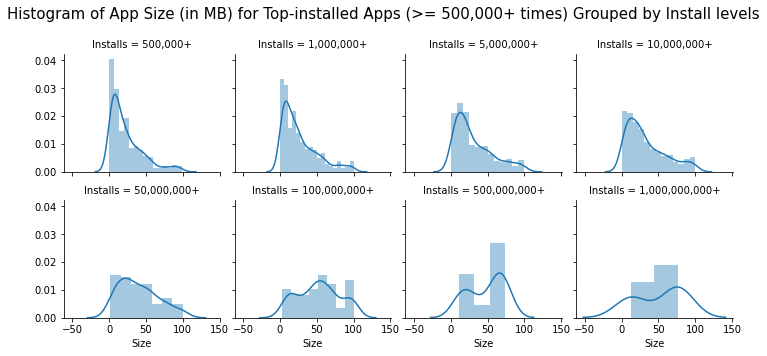

In [46]:
g = sns.FacetGrid(df_2[df_2['Installs'].isin(top_installs)],
                    col='Installs', col_wrap = 4, height = 2.5)
g.map(sns.distplot, "Size")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Histogram of App Size (in MB) for Top-installed Apps (>= 500,000+ times) Grouped by Install levels',
               fontsize = 15)
plt.show()

We then explore the relationship between **rating and size**. 

From the general side:
- For all apps, **as app size becomes bigger, the rating of the app is tend to be higher**.
- The same pattern exists for both paid and free apps.

Text(0.5, 0.98, 'App rating vs. Size (in MB)')

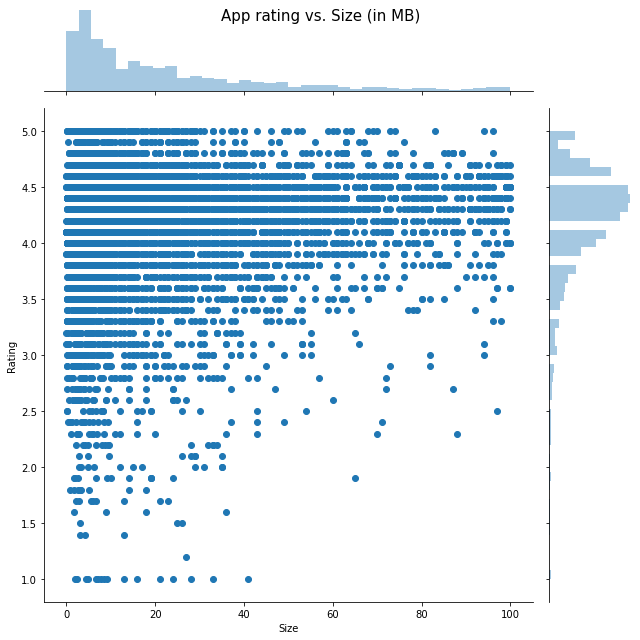

In [47]:
f = sns.jointplot(x = 'Size', y = 'Rating', data = df, height = 9)
f.fig.suptitle('App rating vs. Size (in MB)', fontsize = 15)

Text(0.5, 0.98, 'App rating vs. Size (in MB) for Free & Paid Apps')

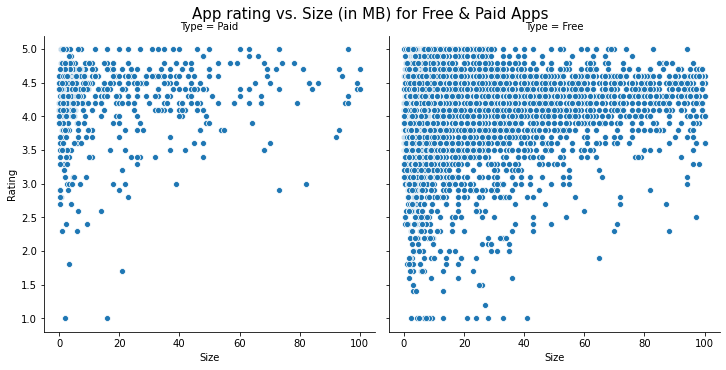

In [48]:
g = sns.FacetGrid(df, col = 'Type', height=5, aspect=1)
g.map_dataframe(sns.scatterplot, x = 'Size', y = 'Rating')
g.set_axis_labels('Size', 'Rating')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('App rating vs. Size (in MB) for Free & Paid Apps',
               fontsize = 15)

The following histogram tells us that: **Most `top-rated apps` are in size of 2MB - 36MB, which is neither too big nor too small.**

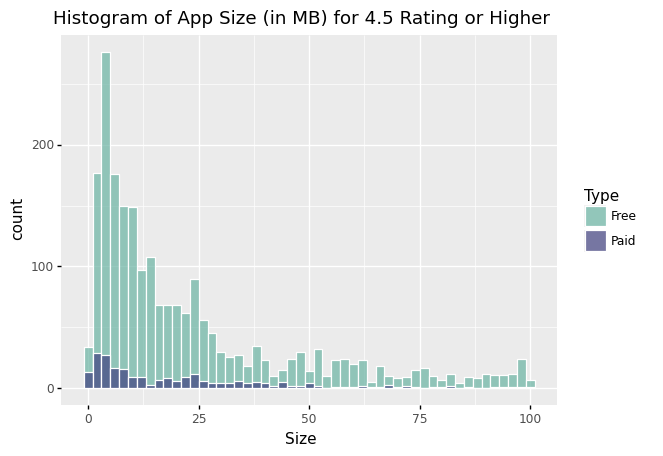

<ggplot: (312799464)>

In [49]:
(ggplot(data = df[df['Rating'] >= 4.5], mapping = aes(x = 'Size', fill = 'Type')) 
  + geom_histogram(binwidth = 2, color = 'white', alpha = 0.7, position = 'identity') 
  + scale_fill_manual(values = ['#69b3a2', '#404080'])
  + labs(title = 'Histogram of App Size (in MB) for 4.5 Rating or Higher')
)

Next, we step into TOP 10 categories with highest average rating. Using the criteria we set (**most review counts + highest rating**) in `App Rating Analysis`, the TOP 10 categories are: FAMILY, GAME, TOOLS, PRODUCTIVITY, MEDICAL, COMMUNICATION, FINANCE, SPORTS, PHOTOGRAPHY, PERSONALIZATION.

The histogram shows that: 
- **It seems that for most categories, higher `rating` is related to a moderate app size - for instance, sized between 0 ~ 30 MB.**
- Family and Game apps shows a different pattern, becasue as we've mentioned before, those two categories comparatively have more apps sized larger, so we'll see more portion in the larger size range from the histogram for these two categories.


In [50]:
top10_rating_cat = df_group[:10].index
top10_rating_cat

Index(['FAMILY', 'GAME', 'TOOLS', 'PRODUCTIVITY', 'MEDICAL', 'COMMUNICATION',
       'FINANCE', 'SPORTS', 'PHOTOGRAPHY', 'PERSONALIZATION'],
      dtype='object', name='Category')

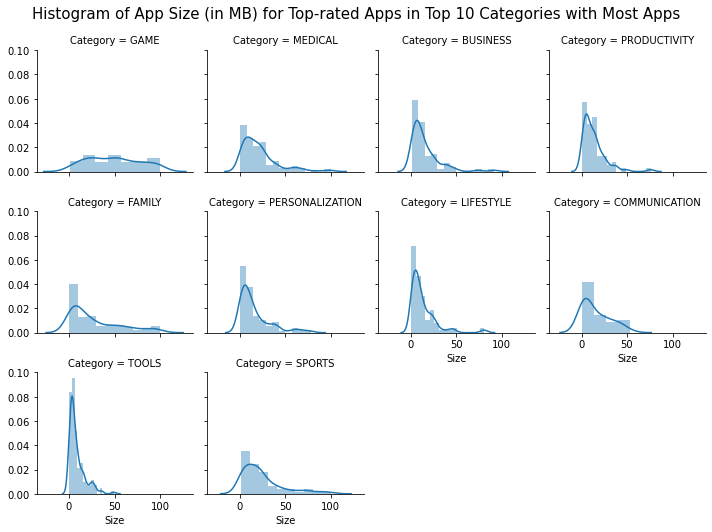

In [51]:
g = sns.FacetGrid(df[df.Rating >= 4.5][df['Category'].isin(top10_cnt_cat)],
                    col='Category', col_wrap = 4, height = 2.5)
g.map(sns.distplot, "Size")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Histogram of App Size (in MB) for Top-rated Apps in Top 10 Categories with Most Apps',
               fontsize = 15)
plt.show()

**Overall, through analyzing on app sizes, we come to find:**

- **Size distribution:**
    - Both `Free` and `Paid` apps have a large partial of size located at the lower level.
    - Most of `Paid` apps have size less than or equal to **50 MB**, while `Free` apps have sizes up to **100 MB**.
    - Most of app categories show a large partial of small app size, while `GAME` and `FAMILY` apps have considerable number of apps to be sized larger.
<br>
- **Size and installs:**
    - A majority of top-downloaded apps (>= 500,000+ times) are sized below **50 MB**.
<br>    
- **Size and rating:**
    - As app size becomes bigger, the rating of the app tends to be higher.
    - Most top-rated apps (rating >= 4.5) are in size of **2MB - 36MB**, which is neither too big nor too small.
 

Therefore, It seems that people tend to download and prefer apps with ligher size. It enlightens app developers to think about optimizing app sizes, especially for apps that are not in category of `GAME` or `FAMILY`.

# User Review Analysis

For the last analysis, we'll focus on apps **user review** and aim to conclude some ideas on app size tuning. With the user review dataset, we'll develop analysis on the following aspects:
- In general, how sentiment polarity differs in the same category and different **categories**?
- On average, which categories receive **the most/least positive evaluaitons**? 
- What **factors** make an app positively/negatively evaluated?

### 1. Review sentiment polarity differences between categories

By calculating the average sentiment polarity for each app category, we generate a plot. The barchart shows: 
- Obvious difference in average sentiment polarity can be found among all categories
- `COMICS, EVENTS, AUTO & VEHICLES, PARENTING` apps are the **TOP 4 categories that receive the most positive evaluations,** which achieve an average score more than 0.3 
- `GAME, SOCIAL, FAMILY` apps are the **TOP 3 categories that receive the least positive evaluations,** mainly due to there're more apps in those categories which could lead to higher variance.

In [52]:
# pivot table for app amounts and average sentiment polarity for each category
df_pivot = pd.pivot_table(df_joined, values=['Sentiment_Polarity', 'App'], index=['Category'],
                          aggfunc = {'Sentiment_Polarity': np.mean,
                                     'App': len}).rename(columns = {'App': 'count',
                                                                    'Sentiment_Polarity': 'mean_polarity'})
df_pivot['category'] = df_pivot.index
df_pivot = df_pivot.reset_index(drop=True).sort_values('mean_polarity')
cat_list = df_pivot['category'].tolist()

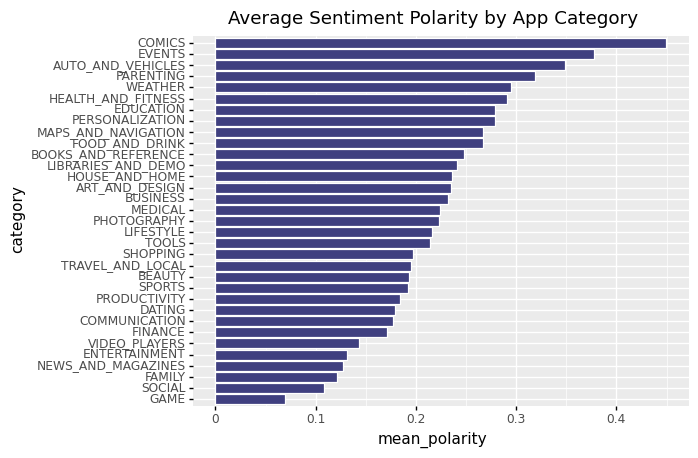

<ggplot: (310966616)>

In [53]:
(ggplot(data = df_pivot, mapping = aes(x = 'category', y = 'mean_polarity'))
  + geom_bar(stat = "identity", fill = '#404080', color = "white")
  + scale_x_discrete(limits=cat_list)
  + coord_flip()
  + labs(title = 'Average Sentiment Polarity by App Category')
)

We then focus on the TOP 10 categories with most apps to explore the distribution of sentiment polarity score. The subplot shows:
- For all selected categories, most part of the reviews are in **neutral sentiment**, and for most of categories, **positive reviews weigh more than negative reviews**.
- For `GAME` and `FAMILY` apps, the positive and negative reiews seems to be more balanced.

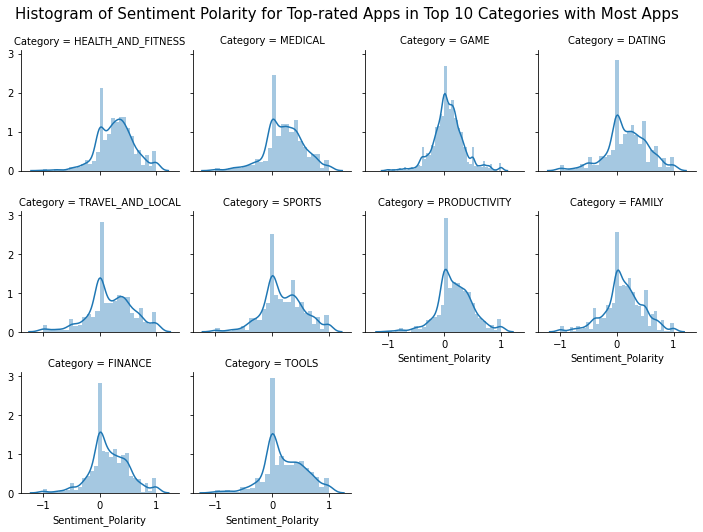

In [54]:
# Categories with highest counts of apps
top10_cnt_cat = list(df_pivot.sort_values(by = 'count', ascending = False)[:10].category)
g = sns.FacetGrid(df_joined[df_joined['Category'].isin(top10_cnt_cat)],
                    col='Category', col_wrap = 4, height = 2.5)
g.map(sns.distplot, 'Sentiment_Polarity')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Histogram of Sentiment Polarity for Top-rated Apps in Top 10 Categories with Most Apps',
               fontsize = 15)
plt.show()

### 2. Review text exploration

Furthermore, we hope to identify some important factors that may lead an app to be positively or negatively evaluated. We'll generate word clouds for both positive reviews and negative reviews.

We can see `game` is a common frequent word in both word clouds, indicating there're a lot of users using game apps and actively writing their reviews as an important feedback. Besides,

- The word cloud for positive reviews shows: `easy`, `free`, `help`, `fun`, `feature`, `useful` are some keywords for **positive reviews**.
- The word cloud for negative reviews shows: `hard`, `pay`, `money`, `ad`, `problem`, `useless` are some keywords for **negative reviews**.

Therefore, we can expect an app to be welcomed with the following factors: 
- Free or in lower price 
- Has less advertisements
- With cool features
- Easy to use, is fun to users
- Works well with few problems

In [55]:
ans = df_joined[['Translated_Review','Sentiment']]
ans['Sentiment'].value_counts()

Positive    23073
Negative     8005
Neutral      4851
Name: Sentiment, dtype: int64

In [56]:
# Delete Rows with Neutral value in Sentiment column
ans = ans[ans['Sentiment'] != 'Neutral']
ans['Sentiment'].value_counts()

Positive    23073
Negative     8005
Name: Sentiment, dtype: int64

In [57]:
add_words = ['best', 'great','love', 'like', 'app', 'good', 'nice', 'thing', 'people',
             'great', 'better', 'phone', 'bad', 'thank', 'day', 'thanks', 'time', 'hate', 'worst']
spacy.load('en_core_web_sm')
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS.copy()
spacy_stopwords = spacy_stopwords.union(STOPWORDS)
for i in range(len(add_words)):
    spacy_stopwords.add(add_words[i])

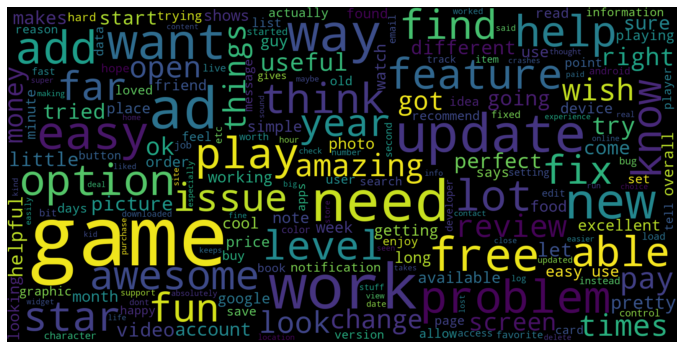

In [58]:
# Positive Wordcloud
pos_tweets = ans[ans['Sentiment'] == 'Positive']
pos_string = []
for t in pos_tweets['Translated_Review']:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.lower().str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200,stopwords=spacy_stopwords).generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

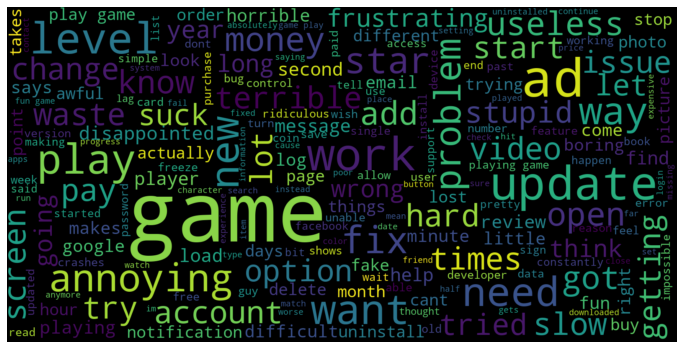

In [59]:
# Negative Wordcloud
neg_tweets = ans[ans['Sentiment'] == 'Negative']
neg_string = []
for t in neg_tweets['Translated_Review']:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.lower().str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200,stopwords=spacy_stopwords).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Summary

Using two datasets about Google Play Store app information and user review, we develop our analysis on various aspects and get key findings regarding **app popularity/rating, price strategy, size design and user preference**. The main take-aways are:
- App categories of family, game, tools, productivity, and medical are more popular
- App categories of lifestyle, finance, family, and photography seem to be more profitable from charging for installation
- Users prefer a paid app with price below $30 and tend to give higher evaluation
- Users prefer llighter apps, app size below 40 MB would be a good choice; but slightly larger app size is okay for game or family apps due to sophiscated design
- lower price, easy to use, cool features, less advertisements, usefulness is the important features for a good app!


#### Future Work

Currently, what we are focusing on is data visualization and using our visuals to tell stories. We can perform feature engineering and work towards using machine learning methods to predict the rating of an app.

**The prediction could help app developers:**

- To quantify the effect of price, size, contents and other features on app rating
- To further think about how to improve app rating through optimizing strategy and app design regarding important feature characteristics.